In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
columns=['species','weight','lenght1','lenght2','lenght3','height%','width%','sex']

In [7]:
data=pd.read_csv('https://jse.amstat.org/datasets/fishcatch.dat.txt', delimiter='\s+', header=None, names=columns)
data

,species,weight,lenght1,lenght2,lenght3,height%,width%,sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN
...,...,...,...,...,...,...,...,...
155,7,1100.0,39.0,42.0,44.6,28.7,15.4,0.0
156,7,1000.0,39.8,43.0,45.2,26.4,16.1,0.0
157,7,1100.0,40.1,43.0,45.5,27.5,16.3,0.0
158,7,1000.0,40.2,43.5,46.0,27.4,17.7,1.0


In [8]:
data.drop(columns=['species','sex'], inplace=True)

In [9]:
data

,weight,lenght1,lenght2,lenght3,height%,width%
1,242.0,23.2,25.4,30.0,38.4,13.4
2,290.0,24.0,26.3,31.2,40.0,13.8
3,340.0,23.9,26.5,31.1,39.8,15.1
4,363.0,26.3,29.0,33.5,38.0,13.3
5,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
155,1100.0,39.0,42.0,44.6,28.7,15.4
156,1000.0,39.8,43.0,45.2,26.4,16.1
157,1100.0,40.1,43.0,45.5,27.5,16.3
158,1000.0,40.2,43.5,46.0,27.4,17.7


In [10]:
data['weight']=data['weight'].fillna(data['weight'].mean(axis=0))

In [11]:
data

,weight,lenght1,lenght2,lenght3,height%,width%
1,242.0,23.2,25.4,30.0,38.4,13.4
2,290.0,24.0,26.3,31.2,40.0,13.8
3,340.0,23.9,26.5,31.1,39.8,15.1
4,363.0,26.3,29.0,33.5,38.0,13.3
5,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
155,1100.0,39.0,42.0,44.6,28.7,15.4
156,1000.0,39.8,43.0,45.2,26.4,16.1
157,1100.0,40.1,43.0,45.5,27.5,16.3
158,1000.0,40.2,43.5,46.0,27.4,17.7


In [12]:
data.isna().sum()

weight     0
lenght1    0
lenght2    0
lenght3    0
height%    0
width%     0
dtype: int64

In [21]:
data_array = data.values
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pipe.fit(data_array)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

([<matplotlib.axis.XTick at 0x2560a18ab50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

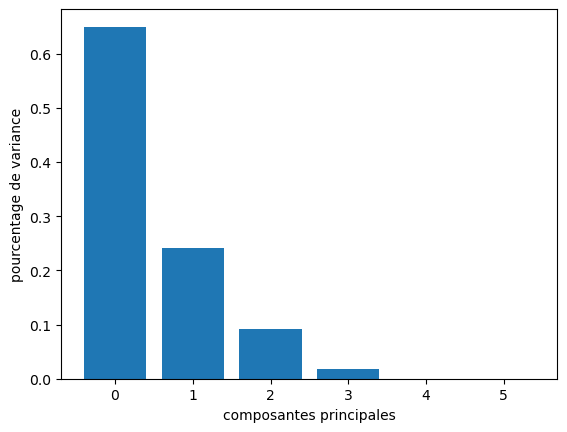

In [22]:
plt.bar(range(pipe[1].n_components_), pipe[1].explained_variance_ratio_)
plt.xlabel('composantes principales')
plt.ylabel('pourcentage de variance')
plt.xticks(range(pipe[1].n_components_))

In [23]:
#étape 1 centrer les données
def centrer_data(data):
    g=data.mean()
    return (data-g)

In [24]:
data_centrer=centrer_data(data)

In [25]:
data_centrer

,weight,lenght1,lenght2,lenght3,height%,width%
1,-156.69557,-3.04717,-3.015723,-1.227044,10.086792,-0.716352
2,-108.69557,-2.24717,-2.115723,-0.027044,11.686792,-0.316352
3,-58.69557,-2.34717,-1.915723,-0.127044,11.486792,0.983648
4,-35.69557,0.05283,0.584277,2.272956,9.686792,-0.816352
5,31.30443,0.25283,0.584277,2.772956,8.286792,0.983648
...,...,...,...,...,...,...
155,701.30443,12.75283,13.584277,13.372956,0.386792,1.283648
156,601.30443,13.55283,14.584277,13.972956,-1.913208,1.983648
157,701.30443,13.85283,14.584277,14.272956,-0.813208,2.183648
158,601.30443,13.95283,15.084277,14.772956,-0.913208,3.583648


In [26]:
#determiner la matrice variance co variance
def mat_covariance(data):
    return (1/data.shape[0])*np.dot(data.T,data)

In [28]:
cov_data=mat_covariance(data_centrer)

In [29]:
cov_data

array([[1.27320978e+05, 3.25747427e+03, 3.50317280e+03, 3.81448240e+03,
        5.69156600e+02, 1.07691281e+02],
       [3.25747427e+03, 9.93003536e+01, 1.06400013e+02, 1.14412121e+02,
        3.05981725e+00, 6.79291563e-01],
       [3.50317280e+03, 1.06400013e+02, 1.14117426e+02, 1.22907562e+02,
        5.00872315e+00, 1.02861081e+00],
       [3.81448240e+03, 1.14412121e+02, 1.22907562e+02, 1.33950023e+02,
        1.29615925e+01, 9.36601796e-01],
       [5.69156600e+02, 3.05981725e+00, 5.00872315e+00, 1.29615925e+01,
        6.84752344e+01, 8.49223686e+00],
       [1.07691281e+02, 6.79291563e-01, 1.02861081e+00, 9.36601796e-01,
        8.49223686e+00, 5.14023575e+00]])